## 1. Gráfico de Superfície 3D (3D Surface Plot)

**Descrição**

O Gráfico de Superfície 3D é uma representação tridimensional que desenha uma superfície conectando pontos de dados. Ele é ideal para visualizar como uma variável (representada no eixo Z, a altura) varia em função de outras duas variáveis independentes (representadas nos eixos X e Y).

---

**Onde pode ser aplicado?**

Este tipo de gráfico é muito utilizado em campos científicos e de engenharia para:
* Mapeamento topográfico, mostrando a altitude (Z) em relação à latitude (X) e longitude (Y).
* Visualização de funções matemáticas complexas.
* Análise de dados de sensores, como a distribuição de temperatura (Z) sobre uma placa de metal (X e Y).
* Em análise de dados, como no nosso exemplo, para ver a frequência de um evento (acidentes) em função de duas variáveis de tempo (dia da semana e hora).

---

**Que tipo de informação pode ser extraída?**

A partir de um gráfico de superfície, podemos extrair:
* **Picos e Vales:** Identificar rapidamente os pontos de máximo (picos) e mínimo (vales) na superfície dos dados.
* **Padrões e Tendências:** Entender como as três variáveis se relacionam. Por exemplo, podemos ver se a frequência de acidentes aumenta consistentemente em um horário específico, independentemente do dia.
* **A "Forma" dos Dados:** Ter uma intuição visual da distribuição geral dos dados no espaço tridimensional.

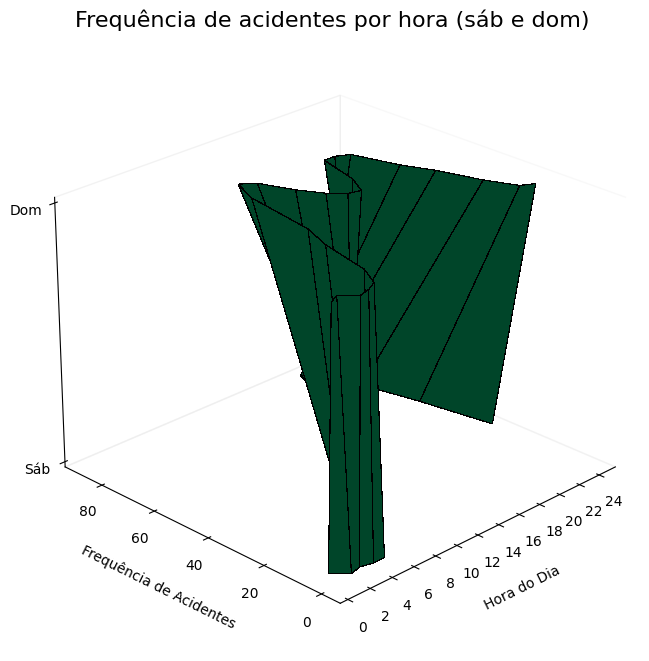

In [1]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Eixo X: Horas de 1 a 24
horas = np.arange(1, 25)

# Eixo Z: Frequência de acidentes para Sábado e Domingo
freq_sabado = np.array([5, 2, 1, 2, 4, 8, 15, 25, 30, 28, 25, 35, 40, 45, 50, 48, 55, 60, 75, 85, 90, 70, 50, 30]) + np.random.randint(-5, 5, 24)
freq_domingo = np.array([8, 4, 2, 3, 6, 12, 25, 40, 60, 75, 70, 60, 55, 50, 48, 55, 65, 70, 68, 55, 40, 30, 20, 15]) + np.random.randint(-5, 5, 24)

# Garante que não há valores negativos
freq_sabado[freq_sabado < 0] = 0
freq_domingo[freq_domingo < 0] = 0

# Eixo Y: Dias da semana (0 para Sábado, 1 para Domingo)
dias_idx = np.array([0, 1])

# Preparação dos Dados para o Gráfico 3D
X, Y = np.meshgrid(horas, dias_idx)
Z = np.array([freq_sabado, freq_domingo])

# Criação e Customização do Gráfico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
surf = ax.plot_surface(X, Z, Y, cmap='YlGn_r', rstride=1, cstride=1, antialiased=False, edgecolor='black', linewidth=0.1)

# Título e Rótulos
ax.set_title('Frequência de acidentes por hora (sáb e dom)', fontsize=16)
ax.set_xlabel('Hora do Dia', labelpad=10)
ax.set_zlabel('Dia da semana', labelpad=10)
ax.set_ylabel('Frequência de Acidentes', labelpad=10)

# Ajustar os marcadores dos eixos
ax.set_xticks(np.arange(0, 25, 2))
ax.set_zticks([0, 1])
ax.set_zticklabels(['Sáb', 'Dom'])

# Ajustar o ângulo de visão
ax.view_init(elev=25, azim=-135)

# Estilo visual
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Mostrar o gráfico
plt.show()